<a href="https://colab.research.google.com/github/kylewalker12/Projects/blob/master/ORIENTME_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline for ORIENTME Challenge on AIcrowd
#### Author : Sharada Mohanty

## To open this notebook on Google Colab, click below!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/5ef00d22288220f0e87e73b74ce55a13)


## Download Necessary Packages

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn 
!{sys.executable} -m pip install matplotlib tqdm 

## Download data
The first step is to download the training data and the test data


In [2]:
# #Donwload the datasets
!rm -rf data/
!mkdir data/

!curl https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/training.tar.gz -o data/training.tar.gz
!curl https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/test.tar.gz -o data/test.tar.gz
!curl https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/sample_submission.csv -o data/sample_submission.csv
!tar xvzf data/training.tar.gz -C data/
!tar xvzf data/test.tar.gz -C data/

Streaming output truncated to the last 5000 lines.
images/008254.jpg
images/007167.jpg
images/008532.jpg
images/007601.jpg
images/005016.jpg
images/005002.jpg
images/008526.jpg
images/007615.jpg
images/009638.jpg
images/008240.jpg
images/007173.jpg
images/005764.jpg
images/006245.jpg
images/009176.jpg
images/008268.jpg
images/005994.jpg
images/006523.jpg
images/009610.jpg
images/007629.jpg
images/006537.jpg
images/009604.jpg
images/005980.jpg
images/005758.jpg
images/006251.jpg
images/009162.jpg
images/008297.jpg
images/009189.jpg
images/009837.jpg
images/009823.jpg
images/008283.jpg
images/005957.jpg
images/007198.jpg
images/006286.jpg
images/007826.jpg
images/007832.jpg
images/006292.jpg
images/005943.jpg
images/005214.jpg
images/007403.jpg
images/008730.jpg
images/007365.jpg
images/008056.jpg
images/009348.jpg
images/005572.jpg
images/005566.jpg
images/007371.jpg
images/008042.jpg
images/006709.jpg
images/007417.jpg
images/008724.jpg
images/005200.jpg
images/009412.jpg
images/006721

In [0]:
## Now the data is available at the following locations:

TRAINING_IMAGES_FOLDER = "data/training/images/"
TRAINING_LABELS_PATH = "data/training/labels.csv"
TEST_IMAGES_FOLDER = "data/images"
SAMPLE_SUBMISSION_FILE_PATH = "data/sample_submission.csv"


## Import packages

In [0]:
import os
import tqdm

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image 


## Load Data
We use PIL library to load our images. Here we are creating our array where our input features are the mean colours and output features are the rotations along the x axis.

In [5]:
training_labels_df = pd.read_csv(TRAINING_LABELS_PATH)

def pre_process_data_X(image):
    """
    This file takes a loaded image and returns a particular 
    representation of the data point
    
    
    NOTE: This current baseline implements a **very** silly approach
    of representing every image by the mean RGB values for every image.
    
    You are encourage to try to alternate representations of the data,
    or figure out how to learn the best representation from the data ;)
    """
    im_array = np.array(im)
    mean_rgb = im_array.mean(axis=(0, 1))
    return mean_rgb


ALL_DATA = []

for _idx, row in tqdm.tqdm(training_labels_df.iterrows(), total=training_labels_df.shape[0]):
    filepath = os.path.join(
        TRAINING_IMAGES_FOLDER,
        row.filename
    )
    im = Image.open(filepath)
    
    data_X = pre_process_data_X(im)
    data_Y = [row.xRot]
    
    ALL_DATA.append((data_X, data_Y))



100%|██████████| 5000/5000 [00:48<00:00, 102.11it/s]


## Exploratory Data Analysis
We now see the kind of images the dataset contains to get a better idea. The title signifies clockwise rotation of the cube along the x axis

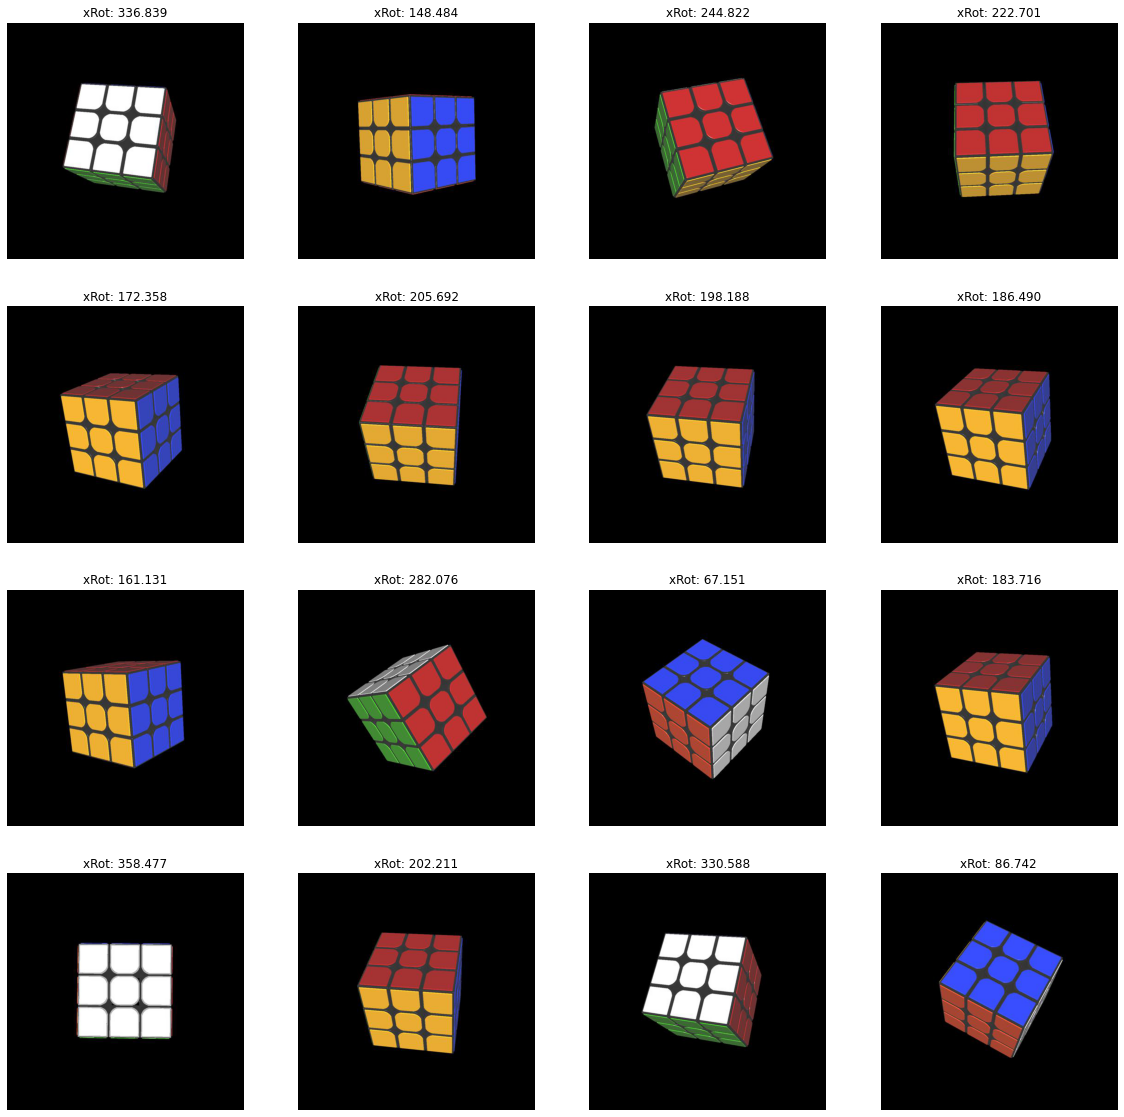

In [6]:
plt.figure(figsize=(20,20))
for i in range(16):
  filename,xRot = training_labels_df.iloc[i]
  filepath = os.path.join(
        TRAINING_IMAGES_FOLDER,
        filename
    )
  im = Image.open(filepath)
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.title("xRot: %.3f"%(xRot))
  plt.imshow(im)

## Split Data into Train and Validation
We split the dataset into Training data and Validation datasets to help us test the generalizability of our models, and to ensure that we are not overfitting on the training set.

In [0]:
training_set, validation_set= train_test_split(ALL_DATA, test_size=0.2, random_state=42) 

Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Now, since we have our data splitted into train and validation sets, we need to get the label separated from the data.

In [0]:
X_train, y_train = zip(*training_set)
X_val, y_val = zip(*validation_set)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

## Define the Classifier
Now we finally come to the juicy part. 
Now that all the data is all loaded and available nice, we can finally get to training the classifier. Here we use sklearn [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to train our network. We can tune the hyper parameters based on cross validation scores 

In [0]:
model = MLPRegressor(hidden_layer_sizes=[10, 10], verbose=True)
# NOTE : This is again silly hyper parameter instantiation of this problem,
# and we encourage you to explore what works the best for you.

## Train the classifier

In [10]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 20672.50019326
Iteration 2, loss = 19998.47641845
Iteration 3, loss = 19163.94061260
Iteration 4, loss = 18140.15506565
Iteration 5, loss = 16874.78361391
Iteration 6, loss = 15424.00230787
Iteration 7, loss = 13789.55107121
Iteration 8, loss = 12044.75212484
Iteration 9, loss = 10282.61864202
Iteration 10, loss = 8680.44293126
Iteration 11, loss = 7376.21092289
Iteration 12, loss = 6440.87046371
Iteration 13, loss = 5935.93175958
Iteration 14, loss = 5718.27961733
Iteration 15, loss = 5630.11916576
Iteration 16, loss = 5575.83884219
Iteration 17, loss = 5525.82569886
Iteration 18, loss = 5475.43541592
Iteration 19, loss = 5426.70635763
Iteration 20, loss = 5374.61008790
Iteration 21, loss = 5323.82006224
Iteration 22, loss = 5271.21251725
Iteration 23, loss = 5220.68242816
Iteration 24, loss = 5169.86973677
Iteration 25, loss = 5115.64177683
Iteration 26, loss = 5062.27208991
Iteration 27, loss = 5008.67664563
Iteration 28, loss = 4952.41535478
Iteration 29, loss =

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[10, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model

In [0]:
y_pred = model.predict(X_val)

## Evaluate the Performance
We use the same metrics as that will be used for the test set.  
[MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) and [RMSE](https://www.statisticshowto.com/rmse/) are the metrics for this challenge

In [12]:
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 53.60408138572421
Mean Squared Error: 5657.152059152138
Root Mean Squared Error: 75.21404163553596


## Load Test Set
Load the test data now

In [13]:
import glob

TEST_DATA = []
TEST_FILENAMES = []

for _test_image_path in tqdm.tqdm(glob.glob(os.path.join(TEST_IMAGES_FOLDER, "*.jpg"))):
    filename = os.path.basename(_test_image_path)
    im = Image.open(_test_image_path)
    
    data_X = pre_process_data_X(im)
    TEST_DATA.append(data_X)
    TEST_FILENAMES.append(filename)

100%|██████████| 5001/5001 [00:47<00:00, 104.46it/s]


In [0]:
TEST_DATA = np.array(TEST_DATA)
# model = classifier

## Make predictions on the test set

In [0]:
test_predictions = model.predict(TEST_DATA)

In [0]:
test_df = pd.DataFrame(test_predictions, columns=['xRot'])
test_df["filename"] = TEST_FILENAMES

## Save the prediction to csv

In [0]:
test_df.to_csv('submission.csv', index=False)

**Note**: Do take a look at the submission format.The submission file should contain the following header : `filename,xRot`.

## To download the generated csv in Google Colab run the below command

In [0]:
from google.colab import files
files.download('submission.csv')

### Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/orientme). Participate in the challenge and submit the submission.csv.